<a href="https://colab.research.google.com/github/ssoma2mc/Data110/blob/main/ShinkoSoma_ArtProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my draft of the art project.

I am currenlty drawing manually the following map, making it less "mappy."

I faced the problems handling the data. Could you teach me how to handle data?
- I could not handle cvs nor API. I download excel files and change into the form I could use mannuary.
- I could not mearge the data. I accessed different data sets each time.


# Data-Driven Art Assignment  

## Objective  
Create a **handmade** piece of art inspired by a dataset of your choice. The goal is to transform data into a visual form that conveys meaning beyond numbers.  

## Guidelines  
- **Choose a dataset** that interests you—it can be about anything (science, society, nature, music, personal interests, etc.).  
- **Create a physical artwork** (painting, drawing, watercolor, collage, or other traditional media—no digital art).  
- The artwork should be **larger than 8x10 inches** in size.  
- Your art should **reflect something from the data**, whether patterns, relationships, trends, or emotions.  
- Include a **brief (3-5 sentence) explanation** of how your work connects to the dataset.  

## Submission  
- **Bring your artwork to class** and submit it to the faculty.  
- **Share your dataset** (a link or a short description of where it came from).  
- Be prepared to **discuss your process and interpretation** with the class.  

### Data

##### UNESCO

https://tcg.uis.unesco.org/data-resources/

4.1.4 for the Data Digest (4.1.2 for the computer)

##### World Bank
https://data.worldbank.org/indicator/SE.TER.CUAT.BA.FE.ZS

Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)








# PLAN 1

### Message

Women's education has come a long way, and today many women have access to primary education. However, the number of women who can pursue higher education remains a minority. The fewer the women who are able to continue their studies, the more challenging it becomes. Through this artwork, I want to send a message of encouragement to those women who continue to pursue education despite these challenges.

In this piece, I represent the percentage of women who complete secondary education with a gradient of blue—darker shades signify fewer women. The university enrollment rates for women are depicted as stars.

Just as the night sky appears darker, the stars shine brighter. The more visible you become, the more likely you are to face criticism or harassment. Nevertheless, stars continue to shine with strength and beauty in the night sky.

No one can take away your light. Be strong, be beautiful, and, while never forgetting the importance of those around you, trust in yourself and keep moving forward. You are the shining stars of hope for all.


- "Your light cannot be dimmed."
- "Shine brighter, even in the darkest skies."
- "Strength in silence, brilliance in struggle."
- "Stars rise from darkness."
- "Be the hope that lights the way."


In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

import matplotlib.font_manager as fm

In [157]:
import pandas as pd
import requests
from io import BytesIO

# change from 'blob' into 'raw'
url = "https://github.com/ssoma2mc/Data110/raw/main/ArtProject/UNESCO_Upper_Secoundary.xlsx"
response = requests.get(url)

df_upper = pd.read_excel(BytesIO(response.content))
print(df_upper.head())
print(df_upper.info())

url = "https://github.com/ssoma2mc/Data110/raw/main/ArtProject/UNESCO_Lower_Secondary.xlsx"
response = requests.get(url)

df_lower = pd.read_excel(BytesIO(response.content))
print(df_lower.head())
print(df_lower.info())

url = "https://github.com/ssoma2mc/Data110/raw/main/ArtProject/UNESCO_Primary.xlsx"
response = requests.get(url)

df_primary = pd.read_excel(BytesIO(response.content))
print(df_primary.head())
print(df_primary.info())

url = "https://github.com/ssoma2mc/Data110/raw/main/ArtProject/Wolrd_Bank_Data.xlsx"
response = requests.get(url)

df_worldbank = pd.read_excel(BytesIO(response.content))
df_worldbank.head()
df_worldbank.info()

       Country alpha_2 alpha_3  latest_data_uppersecondary_total  \
0  Afghanistan      AF     AFG                             26.70   
1   Bangladesh      BD     BGD                             29.36   
2       Bhutan      BT     BTN                             20.98   
3        India      IN     IND                             50.63   
4   Kazakhstan      KZ     KAZ                             97.61   

   latest_data_uppersecondary_female  latest_data_uppersecondary_male  
0                              19.31                            35.53  
1                              27.34                            31.57  
2                              17.91                            24.56  
3                              47.80                            53.80  
4                              96.54                            98.70  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column                             Non-Null Count 

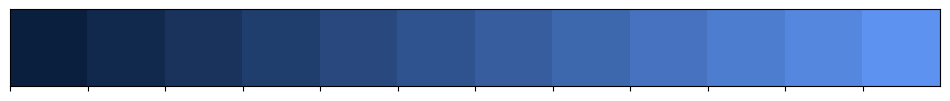

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Set the start and end colors for the gradient
start_color = "#0A1F3D"  # Dark blue
end_color = "#5D92F0"  # Light blue

# Create a gradient with 12 colors using interpolation
cmap = mcolors.LinearSegmentedColormap.from_list("blue_gradient", [start_color, end_color], N=12)

# Convert the generated colors into a list
blues_palette = [cmap(i) for i in range(cmap.N)]

# Display the gradient
sns.palplot(blues_palette)
plt.show()





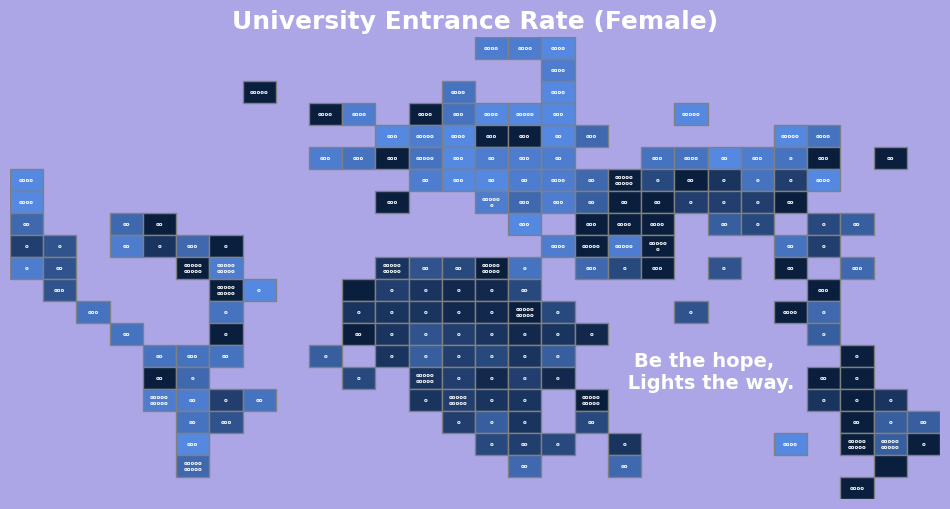

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Color palette setup
blues_palette = [cmap(i) for i in range(cmap.N)]

# Function to determine color
def get_color(value):
    if 0 <= value < 10:
        return blues_palette[1]
    elif 10 <= value < 20:
        return blues_palette[2]
    elif 20 <= value < 30:
        return blues_palette[3]
    elif 30 <= value < 40:
        return blues_palette[4]
    elif 40 <= value < 50:
        return blues_palette[5]
    elif 50 <= value < 60:
        return blues_palette[6]
    elif 60 <= value < 70:
        return blues_palette[7]
    elif 70 <= value < 80:
        return blues_palette[8]
    elif 80 <= value < 90:
        return blues_palette[9]
    else:
        return blues_palette[10]

# Determine color based on 'latest_data_uppersecondary_total'
df_upper['color'] = df_upper['latest_data_uppersecondary_total'].apply(get_color)

# Function to determine symbols (using 'latest_data_bachelor_female' from df_worldbank)
def get_symbol(value):
    if 0 <= value < 10:
        return "o"
    elif 10 <= value < 20:
        return "oo"
    elif 20 <= value < 30:
        return "ooo"
    elif 30 <= value < 40:
        return "oooo"
    elif 40 <= value < 50:
        return "ooooo"
    elif 50 <= value < 60:
        return "ooooo\no"
    elif 60 <= value < 70:
        return "ooooo\noo"
    elif 70 <= value < 80:
        return "ooooo\nooo"
    elif 80 <= value < 90:
        return "ooooo\noooo"
    else:
        return "ooooo\nooooo"

# Determine symbols based on 'latest_data_bachelor_female'
df_worldbank['symbol'] = df_worldbank['latest_data_bachelor_female'].apply(get_symbol)

# Define the tile grid (changed to 3-letter country codes)
world_grid = [
    ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "NOR", "SWE", "FIN", "", "", "", "", "", "", "", "", "", "", "" ],
    ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "EST", "", "", "", "", "", "", "", "", "", "", ""],
    ["", "", "", "", "", "", "", "ISL", "", "", "", "", "", "DNK", "", "","LVA", "", "", "", "", "", "", "", "", "", "", ""],
    ["", "", "", "", "", "", "", "", "", "IRL", "GBR", "", "NLD", "DEU", "POL", "LTU", "BLR", "", "", "", "RUS", "", "", "", "", "", "", ""],
    ["", "", "", "", "", "", "", "", "", "", "", "FRA", "BEL", "CHE", "CZE", "SVK", "UKR", "MDA", "", "", "", "", "", "KAZ", "MNG", "", "", ""],
    ["", "", "", "", "", "", "", "", "", "PRT", "ESP", "AND", "LUX", "SVN", "AUT", "HUN", "ROU", "", "", "ARM", "GEO", "UZB", "KGZ", "CHN", "PRK", "", "JPN", ""],
    ["CAN", "", "", "", "", "", "", "", "", "", "", "", "ITA", "HRV", "BIH", "SRB", "BGR", "TUR", "SYR", "IRQ", "AZE", "TKM", "TJK", "BTN", "KOR", "", "", ""],
    ["USA", "", "", "", "", "", "", "", "", "", "", "MLT", "", "", "MNE", "ALB", "MKD", "JOR", "KWT", "IRN", "PAK", "AFG", "BGD", "MMR", "", "", "", ""],
    ["MEX", "", "", "CUB", "BHS", "", "", "", "", "", "", "", "", "", "", "GRC", "", "LBN", "SAU", "BHR", "", "IND", "NPL", "", "LAO", "VNM", "", ""],
    ["GTM", "BLZ", "", "JAM", "HTI", "DOM", "GRD", "", "", "", "", "", "", "", "", "", "CYP", "ISR", "QAT", "ARE", "", "", "", "THA", "KHM", "", "", ""],
    ["SLV", "HND", "", "", "", "KNA", "LCA", "", "", "", "", "MAR", "DZA", "TUN", "LBY", "EGY", "", "PSE", "YEM", "OMN", "", "LKA", "", "MYS", "", "PHL", "", ""],
    ["", "NIC", "", "", "", "", "VCT", "BRB", "", "", "MRU", "GMB", "SEN", "MLI", "NER", "SDN", "", "", "", "", "", "", "", "", "BRN", "", "", ""],
    ["", "", "CRI", "", "", "", "DMA", "", "", "", "GNB", "SLE", "BFA", "TCD", "SSD", "ERI", "DJI", "", "", "", "MDV", "", "", "SGP", "IDN", "", "", ""],
    ["", "", "", "PAN", "", "", "GRD", "", "", "", "GIN", "LBR", "GHA", "TGO", "BEN", "CAF", "ETH", "SOM", "", "", "", "", "", "", "TLS", "", "", ""],
    ["", "", "", "", "COL", "VEN", "TTO", "", "", "CPV", "", "CIV", "NGA", "CMR", "COD", "UGA", "KEN", "", "", "", "", "", "", "", "", "MHL", "", ""],
    ["", "", "", "", "ECU", "GUY", "", "", "", "", "STP", "", "GNQ", "COG", "BDI", "RWA", "TZA", "", "", "", "", "", "", "", "PLW", "FSM", "", ""],
    ["", "", "", "", "PER", "BOL", "SUR", "BRA", "", "", "", "", "AGO", "GAB", "MWI", "MOZ", "", "SYC", "", "", "", "", "", "", "PNG", "NRU", "KIR", ""],
    ["", "", "", "", "", "PRY", "URY", "", "", "", "", "", "", "ZMB", "BWA", "ZWE", "", "COM", "", "", "", "", "", "", "", "SLB", "TUV", "WSM"],
    ["", "", "", "", "", "CHL", "", "", "", "", "", "", "", "", "NAM", "SWZ", "LSO", "", "MDG", "", "", "", "", "AUS", "", "VUT", "FJI", "TON"],
    ["", "", "", "", "", "ARG", "", "", "", "", "", "", "", "", "", "ZAF", "", "", "MUS", "", "", "", "", "", "", "", "CK", ""],
    ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "NZL", "", ""]
]

# Grid size
rows = len(world_grid)
cols = len(world_grid[0])

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each cell
for i in range(rows):
    for j in range(cols):
        country = world_grid[i][j]
        if country:  # If not empty
            # Get color from df_upper
            color = df_upper.loc[df_upper['alpha_3'] == country, 'color'].values
            # Get symbol from df_worldbank
            symbol = df_worldbank.loc[df_worldbank['alpha_3'] == country, 'symbol'].values
            rect = plt.Rectangle(
                (j, rows - i - 1), 1, 1, fill=True,
                facecolor=color[0] if len(color) > 0 else blues_palette[0],  # Change color to facecolor
                edgecolor="gray"
            )
            ax.add_patch(rect)
            # Display the first element of symbol[0]
            ax.text(j + 0.5, rows - i - 0.5, symbol[0] if len(symbol) > 0 else "", ha="center", va="center", fontsize=4, fontweight="bold", color="white")

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_frame_on(False)

# Set background color (dark purple) with transparency
fig.patch.set_facecolor('#5A4FCF')
fig.patch.set_alpha(0.5)

# Add message inside the graph
ax.text(cols - 7, 5, "Be the hope, \n Lights the way.", ha="center", fontsize=14, color="white", fontweight="bold")

# Title
plt.title("University Entrance Rate (Female)", fontsize=18, color="white", fontweight="bold")
plt.show()





# PLAN 2

Represent each tile grid with multiple rectangles to depict primary, lower secondary, upper secondary, and so on.

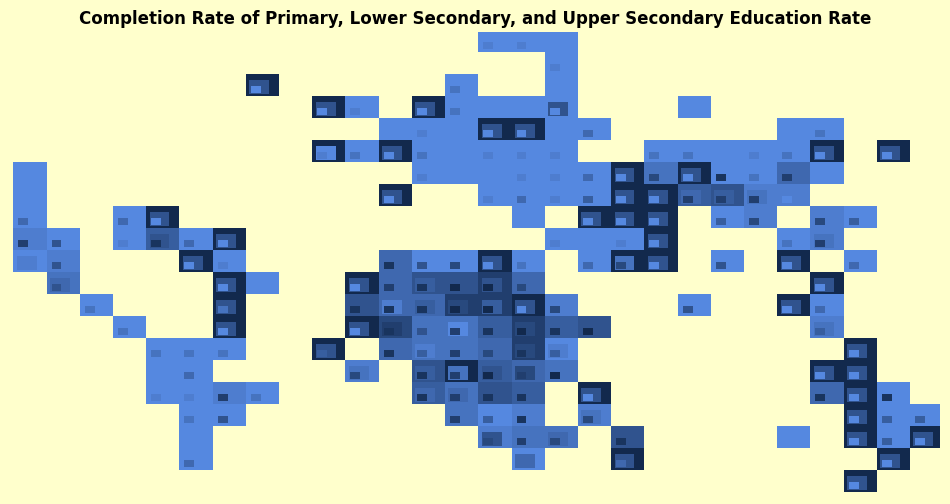

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
blues_palette = [cmap(i) for i in range(cmap.N)]

# Function to determine color
def get_color(value):
    if 0 <= value < 10:
        return blues_palette[1]
    elif 10 <= value < 20:
        return blues_palette[2]
    elif 20 <= value < 30:
        return blues_palette[3]
    elif 30 <= value < 40:
        return blues_palette[4]
    elif 40 <= value < 50:
        return blues_palette[5]
    elif 50 <= value < 60:
        return blues_palette[6]
    elif 60 <= value < 70:
        return blues_palette[7]
    elif 70 <= value < 80:
        return blues_palette[8]
    elif 80 <= value < 90:
        return blues_palette[9]
    else:
        return blues_palette[10]

# Determine colors based on 'latest_data_uppersecondary_total', 'latest_data_lowersecondary_total', and 'latest_data_primary_total'
df_upper['color'] = df_upper['latest_data_uppersecondary_total'].apply(get_color)
df_lower['color'] = df_lower['latest_data_lowersecondary_total'].apply(get_color)
df_primary['color'] = df_primary['latest_data_primary_total'].apply(get_color)

# Define the world grid (using 3-letter country codes)
world_grid = [
    ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "NOR", "SWE", "FIN", "", "", "", "", "", "", "", "", "", "", "" ],
    ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "EST", "", "", "", "", "", "", "", "", "", "", ""],
    ["", "", "", "", "", "", "", "ISL", "", "", "", "", "", "DNK", "", "","LVA", "", "", "", "", "", "", "", "", "", "", ""],
    ["", "", "", "", "", "", "", "", "", "IRL", "GBR", "", "NLD", "DEU", "POL", "LTU", "BLR", "", "", "", "RUS", "", "", "", "", "", "", ""],
    ["", "", "", "", "", "", "", "", "", "", "", "FRA", "BEL", "CHE", "CZE", "SVK", "UKR", "MDA", "", "", "", "", "", "KAZ", "MNG", "", "", ""],
    ["", "", "", "", "", "", "", "", "", "PRT", "ESP", "AND", "LUX", "SVN", "AUT", "HUN", "ROU", "", "", "ARM", "GEO", "UZB", "KGZ", "CHN", "PRK", "", "JPN", ""],
    ["CAN", "", "", "", "", "", "", "", "", "", "", "", "ITA", "HRV", "BIH", "SRB", "BGR", "TUR", "SYR", "IRQ", "AZE", "TKM", "TJK", "BTN", "KOR", "", "", ""],
    ["USA", "", "", "", "", "", "", "", "", "", "", "MLT", "", "", "MNE", "ALB", "MKD", "JOR", "KWT", "IRN", "PAK", "AFG", "BGD", "MMR", "", "", "", ""],
    ["MEX", "", "", "CUB", "BHS", "", "", "", "", "", "", "", "", "", "", "GRC", "", "LBN", "SAU", "BHR", "", "IND", "NPL", "", "LAO", "VNM", "", ""],
    ["GTM", "BLZ", "", "JAM", "HTI", "DOM", "GRD", "", "", "", "", "", "", "", "", "", "CYP", "ISR", "QAT", "ARE", "", "", "", "THA", "KHM", "", "", ""],
    ["SLV", "HND", "", "", "", "KNA", "LCA", "", "", "", "", "MAR", "DZA", "TUN", "LBY", "EGY", "", "PSE", "YEM", "OMN", "", "LKA", "", "MYS", "", "PHL", "", ""],
    ["", "NIC", "", "", "", "", "VCT", "BRB", "", "", "MRU", "GMB", "SEN", "MLI", "NER", "SDN", "", "", "", "", "", "", "", "", "BRN", "", "", ""],
    ["", "", "CRI", "", "", "", "DMA", "", "", "", "GNB", "SLE", "BFA", "TCD", "SSD", "ERI", "DJI", "", "", "", "MDV", "", "", "SGP", "IDN", "", "", ""],
    ["", "", "", "PAN", "", "", "GRD", "", "", "", "GIN", "LBR", "GHA", "TGO", "BEN", "CAF", "ETH", "SOM", "", "", "", "", "", "", "TLS", "", "", ""],
    ["", "", "", "", "COL", "VEN", "TTO", "", "", "CPV", "", "CIV", "NGA", "CMR", "COD", "UGA", "KEN", "", "", "", "", "", "", "", "", "MHL", "", ""],
    ["", "", "", "", "ECU", "GUY", "", "", "", "", "STP", "", "GNQ", "COG", "BDI", "RWA", "TZA", "", "", "", "", "", "", "", "PLW", "FSM", "", ""],
    ["", "", "", "", "PER", "BOL", "SUR", "BRA", "", "", "", "", "AGO", "GAB", "MWI", "MOZ", "", "SYC", "", "", "", "", "", "", "PNG", "NRU", "KIR", ""],
    ["", "", "", "", "", "PRY", "URY", "", "", "", "", "", "", "ZMB", "BWA", "ZWE", "", "COM", "", "", "", "", "", "", "", "SLB", "TUV", "WSM"],
    ["", "", "", "", "", "CHL", "", "", "", "", "", "", "", "", "NAM", "SWZ", "LSO", "", "MDG", "", "", "", "", "AUS", "", "VUT", "FJI", "TON"],
    ["", "", "", "", "", "ARG", "", "", "", "", "", "", "", "", "", "ZAF", "", "", "MUS", "", "", "", "", "", "", "", "CK", ""],
    ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "NZL", "", ""]
]

# Grid size
rows = len(world_grid)
cols = len(world_grid[0])

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each cell
for i in range(rows):
    for j in range(cols):
        country = world_grid[i][j]
        if country:  # If not empty
            # Get colors from each education stage
            primary_color = df_primary.loc[df_primary['alpha_3'] == country, 'color'].values
            lower_secondary_color = df_lower.loc[df_lower['alpha_3'] == country, 'color'].values
            upper_secondary_color = df_upper.loc[df_upper['alpha_3'] == country, 'color'].values

            # Inner frame (Upper Secondary)
            rect_inner = plt.Rectangle(
                (j + 0.25, rows - i - 1 + 0.25), 0.3, 0.3, fill=True, facecolor=upper_secondary_color[0] if len(upper_secondary_color) > 0 else blues_palette[10]
            )
            # Middle frame (Lower Secondary)
            rect_middle = plt.Rectangle(
                (j + 0.2, rows - i - 1 + 0.2), 0.6, 0.6, fill=True, facecolor=lower_secondary_color[0] if len(lower_secondary_color) > 0 else blues_palette[5]
            )
            # Outer frame (Primary)
            rect_outer = plt.Rectangle(
                (j + 0.1, rows - i - 1 + 0.1), 1, 1, fill=True, facecolor=primary_color[0] if len(primary_color) > 0 else blues_palette[1]
            )

            # Add each rectangle
            ax.add_patch(rect_outer)  # Primary frame
            ax.add_patch(rect_middle)  # Lower Secondary frame
            ax.add_patch(rect_inner)   # Upper Secondary frame

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_frame_on(False)

# Set background color (dark purple) and opacity
fig.patch.set_facecolor("yellow")
fig.patch.set_alpha(0.2)

# Title
plt.title("Completion Rate of Primary, Lower Secondary, and Upper Secondary Education Rate", fontsize=12, color="Black", fontweight="bold")
plt.show()



